# WeatherPy

In [3]:
! pip install citipy

  Using cached citipy-0.0.5.tar.gz (557 kB)
  Using cached kdtree-0.16-py2.py3-none-any.whl (7.7 kB)
  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559701 sha256=20e91fd61c76028fdd34477e75e934297d58f947cb2fcd87211920f439cc6797
  Stored in directory: /Users/kristin/Library/Caches/pip/wheels/6d/df/5e/ad8eb9cc5ee7f4ba76865167c09f9a7edff405c669111d8353
Successfully built citipy


In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from requests.utils import requote_uri
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
fill_url = requests.utils.requote_uri
query_url = f"{url}appid={weather_api_key}&units={units}&q="

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
total_cities = len(cities)
print()
print(f"Total number of cities: {total_cities}")


Total number of cities: 616


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#Set variables needed for analysis
city_weather = []
cou = []
lat = []
long = []
temp = []
humid = []
cloud = []
wind = []
city_num = 1
city_set = 1 

# Language to show processing
print('''
-----------------------------
Beginning Data Retrieval
-----------------------------''')

# Pull data to create dataframe
for city in cities:
    try:
        final_url = fill_url(query_url + city)
#         print(final_url)
        response = requests.get(final_url).json()
#         print(response)
        city_weather.append(response['name'])
        cou.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])

        print(f"Processing Record {city_num} of set {city_set} | {city}")
        
        # Add one to city count
        city_num += 1 
    
    except (KeyError):
        print("City not found....Skipping............")
        
    #Create sets of 50
    if city_num == 51:
        city_set += 1
        city_num = 1

print('''
-----------------------------
Data Retrieval Complete
-----------------------------''')


-----------------------------
Beginning Data Retrieval
-----------------------------
Processing Record 1 of set 1 | hilo
Processing Record 2 of set 1 | mar del plata
Processing Record 3 of set 1 | chokurdakh
Processing Record 4 of set 1 | berezovka
Processing Record 5 of set 1 | lompoc
Processing Record 6 of set 1 | ushuaia
Processing Record 7 of set 1 | kodiak
Processing Record 8 of set 1 | kapaa
Processing Record 9 of set 1 | aragarcas
Processing Record 10 of set 1 | bredasdorp
Processing Record 11 of set 1 | ancud
Processing Record 12 of set 1 | cayenne
Processing Record 13 of set 1 | kaitangata
Processing Record 14 of set 1 | canillo
Processing Record 15 of set 1 | fortuna
Processing Record 16 of set 1 | pevek
Processing Record 17 of set 1 | weligama
Processing Record 18 of set 1 | tessalit
Processing Record 19 of set 1 | mae hong son
Processing Record 20 of set 1 | glens falls
Processing Record 21 of set 1 | cherskiy
Processing Record 22 of set 1 | tanete
Processing Record 23 of 

Processing Record 32 of set 4 | catamarca
Processing Record 33 of set 4 | lima
Processing Record 34 of set 4 | praia da vitoria
Processing Record 35 of set 4 | gizo
Processing Record 36 of set 4 | dunedin
Processing Record 37 of set 4 | urshelskiy
Processing Record 38 of set 4 | erenhot
Processing Record 39 of set 4 | pasinler
Processing Record 40 of set 4 | portland
City not found....Skipping............
Processing Record 41 of set 4 | port-gentil
Processing Record 42 of set 4 | harper
Processing Record 43 of set 4 | flinders
Processing Record 44 of set 4 | rudnogorsk
Processing Record 45 of set 4 | sola
Processing Record 46 of set 4 | tongren
Processing Record 47 of set 4 | berbera
Processing Record 48 of set 4 | port moresby
Processing Record 49 of set 4 | port hardy
Processing Record 50 of set 4 | marshall
Processing Record 1 of set 5 | neyshabur
Processing Record 2 of set 5 | charlestown
Processing Record 3 of set 5 | airai
Processing Record 4 of set 5 | asau
City not found....Ski

Processing Record 16 of set 8 | mackenzie
Processing Record 17 of set 8 | rio gallegos
Processing Record 18 of set 8 | lunenburg
Processing Record 19 of set 8 | ixtapa
Processing Record 20 of set 8 | soyo
City not found....Skipping............
City not found....Skipping............
Processing Record 21 of set 8 | sarkand
Processing Record 22 of set 8 | kidal
City not found....Skipping............
City not found....Skipping............
Processing Record 23 of set 8 | ponta delgada
Processing Record 24 of set 8 | padang
Processing Record 25 of set 8 | hervey bay
Processing Record 26 of set 8 | hami
Processing Record 27 of set 8 | berlevag
Processing Record 28 of set 8 | palaia fokaia
Processing Record 29 of set 8 | warrnambool
Processing Record 30 of set 8 | normandin
Processing Record 31 of set 8 | yumen
Processing Record 32 of set 8 | champerico
Processing Record 33 of set 8 | pangnirtung
Processing Record 34 of set 8 | tura
Processing Record 35 of set 8 | karratha
Processing Record 36

Processing Record 1 of set 12 | sayyan
Processing Record 2 of set 12 | alenquer
Processing Record 3 of set 12 | kungurtug
Processing Record 4 of set 12 | cacu
Processing Record 5 of set 12 | new orleans
City not found....Skipping............
Processing Record 6 of set 12 | rovaniemi
Processing Record 7 of set 12 | komsomolskiy
Processing Record 8 of set 12 | fort walton beach
Processing Record 9 of set 12 | bell ville
Processing Record 10 of set 12 | san quintin
Processing Record 11 of set 12 | mayachnyy
Processing Record 12 of set 12 | wattegama
City not found....Skipping............
City not found....Skipping............
Processing Record 13 of set 12 | marawi
Processing Record 14 of set 12 | alekseyevka
Processing Record 15 of set 12 | mokhsogollokh
Processing Record 16 of set 12 | gisborne

-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [45]:
# Create a dictionary to hold all cities
weather_dict = {
    'City' : city_weather,
    'County' : cou, 
    'Latitude' : lat,
    'Longitude' : long,
    'Tempurature' : temp,
    'Humidity' : humid,
    'Cloudiness' : cloud, 
    'Wind Speed': wind
}

# Convert to DataFrame
weather_data = pd.DataFrame(weather_dict)

#Export to CSV
weather_data.to_csv("Outputs/Weather_Data", index=False, header=True)

weather_data

,City,County,Latitude,Longitude,Tempurature,Humidity,Cloudiness,Wind Speed
0,Hilo,US,19.7297,-155.0900,18.77,68,90,1.54
1,Mar del Plata,AR,-38.0023,-57.5575,20.17,64,40,8.23
2,Chokurdakh,RU,70.6333,147.9167,-24.08,88,13,1.96
3,Berëzovka,BY,53.7214,25.4993,-11.72,96,93,2.74
4,Lompoc,US,34.6391,-120.4579,10.71,76,90,1.00
...,...,...,...,...,...,...,...,...
561,Wattegama,LK,6.7989,81.4808,20.82,85,58,3.22
562,Marawi,PH,7.9986,124.2928,23.33,94,93,1.34
563,Alekseyevka,RU,50.6309,38.6903,-6.01,97,100,3.64
564,Mokhsogollokh,RU,61.4681,128.9203,-30.92,87,78,1.63


In [8]:
#Statistical summary
weather_data.describe()

,Latitude,Longitude,Tempurature,Humidity,Cloudiness,Wind Speed
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000
mean,19.032773,12.557688,10.209523,72.176678,55.526502,3.596343
std,33.607656,89.401477,18.634301,19.652572,38.649665,2.630875
min,-54.800000,-179.166700,-43.000000,9.000000,0.000000,0.080000
25%,-8.416125,-65.615500,-4.217500,63.000000,20.000000,1.587500
50%,21.555600,17.184750,16.925000,77.000000,69.000000,2.985000
75%,49.420850,88.277075,25.210000,87.000000,92.000000,4.862500
max,78.218600,179.316700,38.200000,100.000000,100.000000,16.460000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

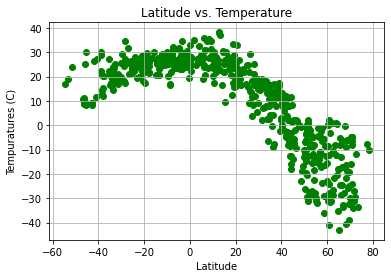

In [47]:
#Define variables
lat = weather_data['Latitude']
temp = weather_data['Tempurature']

#Plot
plt.scatter(lat, temp, color='green')

#Lable
plt.xlabel('Latitude')
plt.ylabel('Tempuratures (C)')
plt.title('Latitude vs. Temperature')
plt.grid('true')

#Save file as png
plt.savefig("Outputs/Latitude vs. Temperature.png")

The plot above shows how the temperature changes across the globe. Since we know the equator to be zero we can see that the highest temperatures are closest to zero and the temperature decreases as you move away from the equator, latitude 0.

## Latitude vs. Humidity Plot

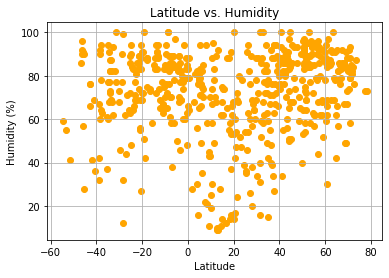

In [61]:
#Define new variables
humid = weather_data['Humidity']

#Plot
plt.scatter(lat, humid, color='orange')

#Label
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs. Humidity')
plt.grid('true')

#Save file as png
plt.savefig("Outputs/Latitude vs. Humidity.png")

The plot above shows humidity levels across the globe. There does not seem to be a correlation between humidity and location.

## Latitude vs. Cloudiness Plot

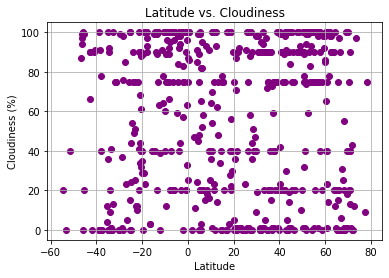

In [49]:
#Define new variables 
cloud = weather_data['Cloudiness']

#Plot
plt.scatter(lat, cloud, color='purple')

#Label
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Latitude vs. Cloudiness')
plt.grid('true')


#Save file as png
plt.savefig("Outputs/Latitude vs. Cloudiness.png")

The plot above shows percent cloudiness across the globe. There appears to be some consistency between some temperatures and cloudiness but more statistical tests are needed to established correlation.

## Latitude vs. Wind Speed Plot

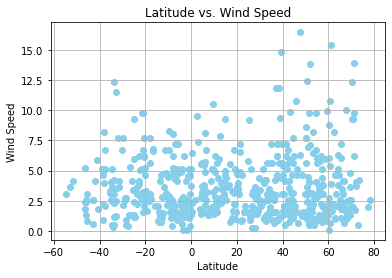

In [51]:
#Add new variables 
wind = weather_data['Wind Speed']

#Plot
plt.scatter(lat, wind, color='skyblue')

#Label
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')
plt.grid('true')

#Save file as png
plt.savefig("Outputs/Latitude vs. Wind Speed.png")

The plot above shows the windspeed across the globe. In general, there seems to be few instances of extremely high wind speed as most speeds are clustered around the bottom of the plot.

## Linear Regression

In [77]:
#Establish north and south hemisphere dataframes

north = weather_data.loc[weather_data['Latitude'] >= 0]
north.head()
# print(len(north))
south = weather_data.loc[weather_data['Latitude'] < 0]
# print(len(south))

,City,County,Latitude,Longitude,Tempurature,Humidity,Cloudiness,Wind Speed
0,Hilo,US,19.7297,-155.0900,18.77,68,90,1.54
2,Chokurdakh,RU,70.6333,147.9167,-24.08,88,13,1.96
3,Berëzovka,BY,53.7214,25.4993,-11.72,96,93,2.74
4,Lompoc,US,34.6391,-120.4579,10.71,76,90,1.00
6,Saint Paul Harbor,US,57.7900,-152.4072,-1.00,80,90,2.00


####  Northern Hemisphere - Tempurature vs. Latitude Linear Regression

The r-value is: 0.7763821438628354


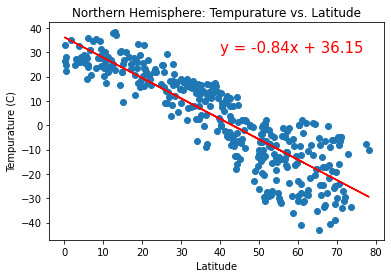

In [112]:
from scipy import stats

#Add associated y_axis
north_lat = north['Latitude']
north_temp = north['Tempurature']

# Linear regression
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_lat, north_temp)

# Get regression values
regress_values = north_lat * slope + intercept

#Create line equation for graph
lneq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot
plt.scatter(north_lat, north_temp)
plt.plot(north_lat,regress_values,"r-")

#Label
plt.xlabel('Latitude')
plt.ylabel('Tempurature (C)')
plt.title('Northern Hemisphere: Tempurature vs. Latitude')
plt.annotate(lneq,(40,30),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

####  Southern Hemisphere - Tempurature vs. Latitude Linear Regression

The r-value is: 0.34535118000503556


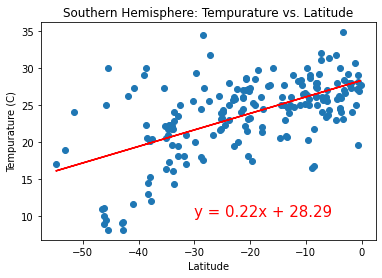

In [113]:
#Add associated y_axis
south_lat = south['Latitude']
south_temp = south['Tempurature']

# Linear regression
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_lat, south_temp)

# Get regression values
regress_values = south_lat * slope + intercept

#Create line equation for graph
lneq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot
plt.scatter(south_lat, south_temp)
plt.plot(south_lat,regress_values,"r-")

#Label
plt.xlabel('Latitude')
plt.ylabel('Tempurature (C)')
plt.title('Southern Hemisphere: Tempurature vs. Latitude')
plt.annotate(lneq,(-30, 10),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.14581671139361171


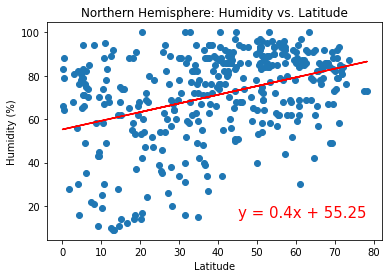

In [114]:
#Add associated y_axis
north_hum = north['Humidity']

# Linear regression
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_lat, north_hum)

# Get regression values
regress_values = north_lat * slope + intercept

#Create line equation for graph
lneq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot
plt.scatter(north_lat, north_hum)
plt.plot(north_lat,regress_values,"r-")

#Label
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere: Humidity vs. Latitude')
plt.annotate(lneq,(45,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.03235274474216011


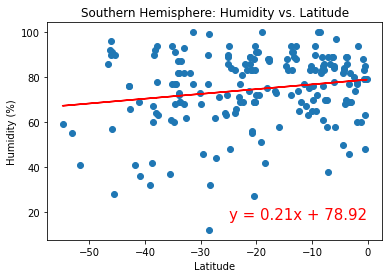

In [116]:
#Add associated y_axis
south_lat = south['Latitude']
south_hum = south['Humidity']

# Linear regression
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_lat, south_hum)

# Get regression values
regress_values = south_lat * slope + intercept

#Create line equation for graph
lneq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot
plt.scatter(south_lat, south_hum)
plt.plot(south_lat,regress_values,"r-")

#Label
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere: Humidity vs. Latitude')
plt.annotate(lneq,(-25, 17),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


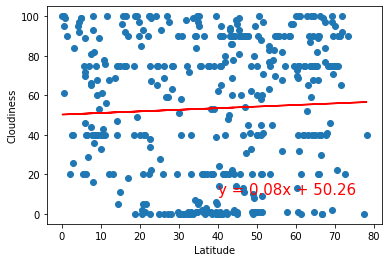

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


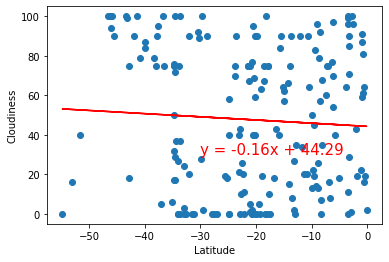

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


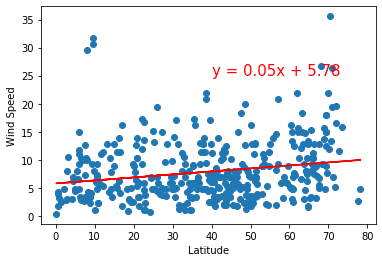

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


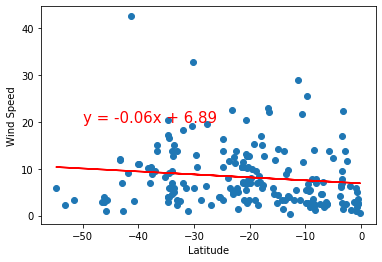